# The Robbins-Monro Algorithm

Whenever the data available to find the MLE estimator of $\theta$ of a pdf $p(x|\theta)$ is vast and does not fit into memory, we might be interested in *sequentially* learning $\hat \theta$. The Robbins Monro algorithm provides a sequence of steps for learning $\hat\theta$.

The RM algorithm learns $\hat\theta$ sequentially following:
$$
    \theta^{(N)} = \theta^{(N - 1)} + \alpha_{N-1} \left. \frac{\partial}{\partial \theta}\log p(x|\theta) \right\rvert_{\theta=\theta^{(N-1)}}
$$

Where $\{a_i\}_i$ is a sequence of positive numbers that satisfy the following conditions:
* $\lim_{N\to\infty} a_N = 0$
* $\sum_i^\infty a_i = \infty$
* $\sum_i^\infty a_i^2 < \infty$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import branca

In [50]:
cmap = branca.colormap.LinearColormap([(140, 46, 45), (86, 86, 90)])
cmap

## Single simulated dataset
Let us consider the example of a single-variable gaussian distribution

In [36]:
np.random.seed(1643)
sample = np.random.randn(1_000_000)

sum_s = sample[0]
theta_n = sum_s / 1
hist = [theta_n]
for N, s in enumerate(sample[1:], 2):
    sum_s += s
    theta_n = sum_s / N + 1 / N * (s - sum_s / N)
    hist.append(theta_n)

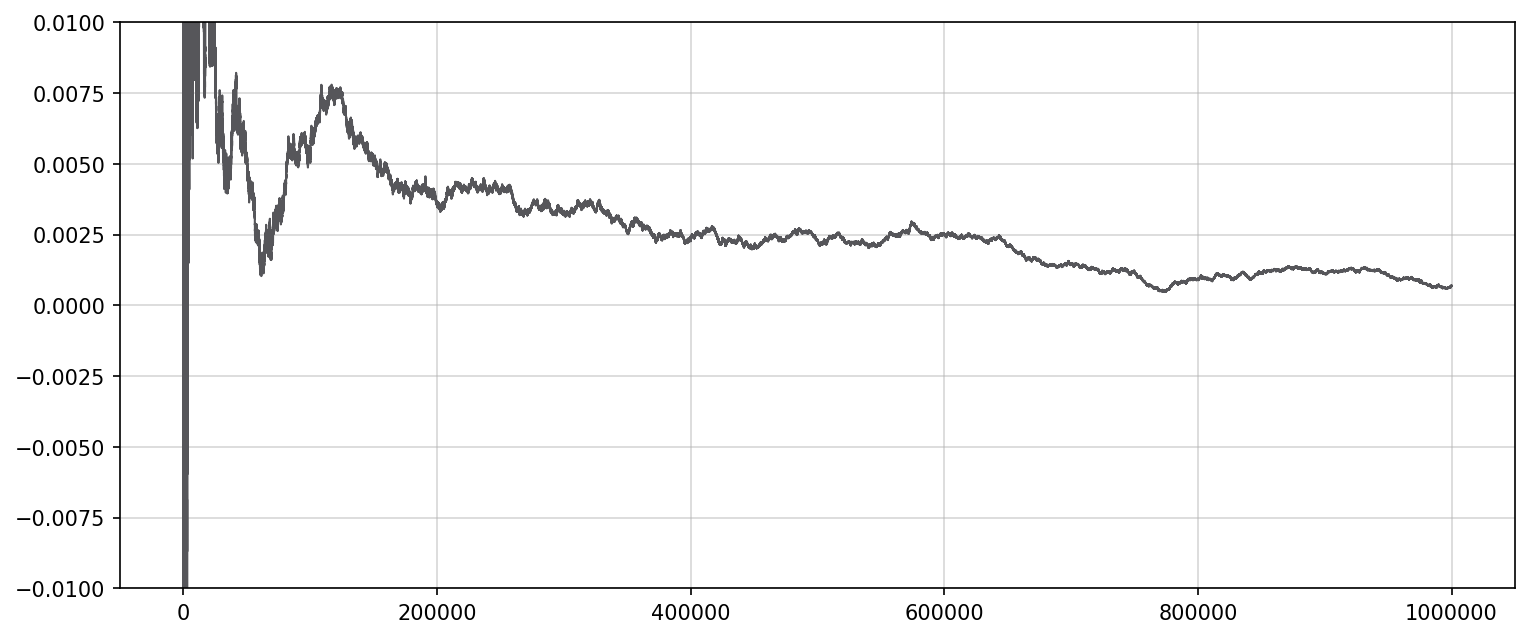

In [51]:
plt.figure(figsize=(12,5), dpi=150)
plt.plot(hist, linewidth=1, color=cmap(1))
plt.ylim(-0.010, 0.010)
plt.grid(alpha=0.5)

After 1 million times, we are barely reaching 0.

## Multiple simulated datasets

In [23]:
%%time
nround = 150
nsamples = 500_000

histories = []
for r in range(nround):
    print(f"At round {r + 1}", end="\r")
    np.random.seed(31415 + r)
    sample = np.random.randn(nsamples)
    sum_s = sample[0]
    theta_n = sum_s / 1
    hist = [theta_n]
    for N, s in enumerate(sample[1:], 2):
        sum_s += s
        theta_n = sum_s / N + 1 / N * (s - sum_s / N)
        hist.append(theta_n)
    histories.append(hist)

CPU times: user 1min 15s, sys: 1.4 s, total: 1min 16s
Wall time: 1min 16s


In [35]:
arrhist = np.array(histories)
mu_mean = arrhist[:,-1].mean()
print(f"the estimated mean is of {mu_mean:0.7f}")

the estimated mean is of -0.0000724


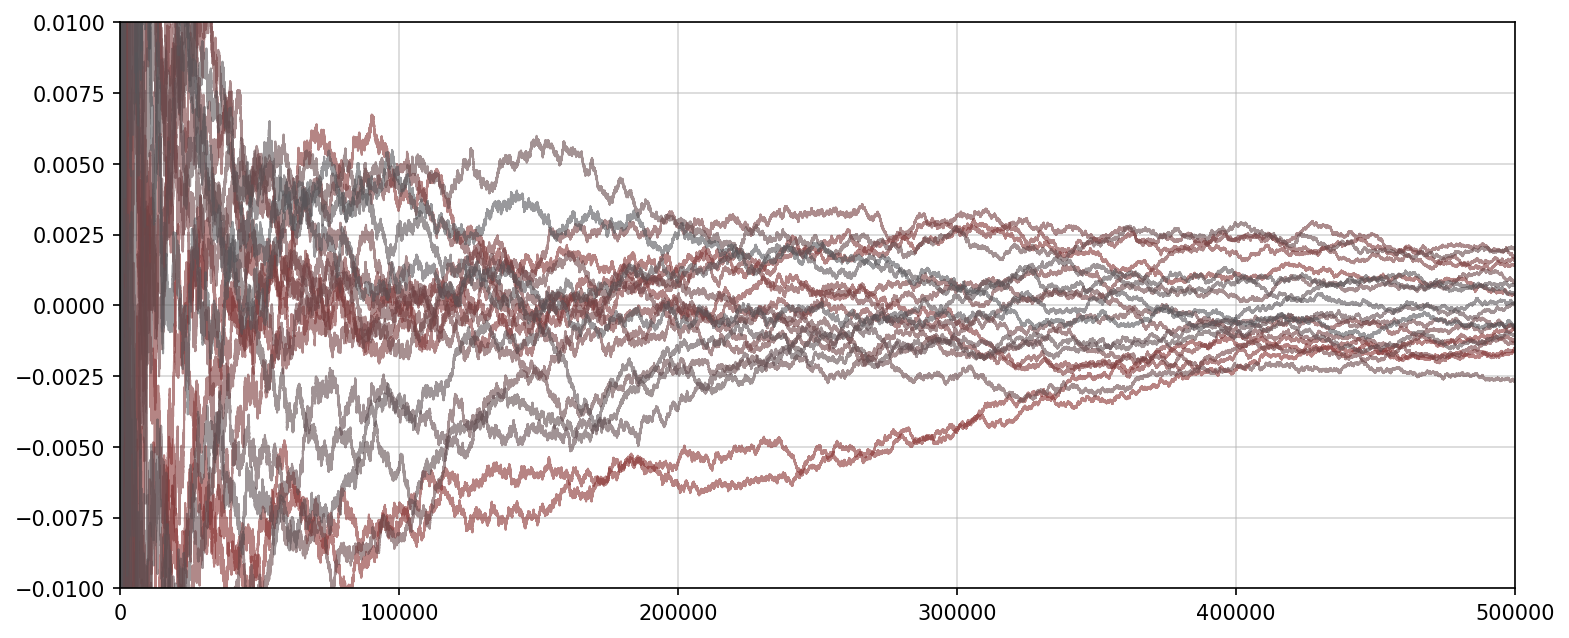

In [34]:
nlines = 20
plt.figure(figsize=(12,5), dpi=150)
for ix in range(1, nlines + 1):
    plt.plot(arrhist[ix].T, alpha=0.6, linewidth=1, color=cmap(ix / nlines))
plt.ylim(-0.01, 0.01)
plt.xlim(-0.1, nsamples +1)
plt.grid(alpha=0.5)